### Customer Churn Analysis
#### Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
1.	Help them identify the types of customers who churn
2.	Predict who of their current customers will churn next month


Import some librairies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
%%capture
! pip install seaborn

### 1. Inspect the data

Import the data and look at the first columns

In [3]:
tel_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tel_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tel_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
tel_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
tel_df.shape

(7043, 21)

We have 7043 rows and 21 columns

In [7]:
tel_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
print(tel_df['gender'].value_counts().to_frame(), '\n', tel_df['SeniorCitizen'].value_counts().to_frame(), 
      '\n', tel_df['Partner'].value_counts().to_frame(), '\n', tel_df['Dependents'].value_counts().to_frame(),
     '\n', tel_df['SeniorCitizen'].value_counts().to_frame(), '\n', tel_df['Partner'].value_counts().to_frame(), 
      '\n', tel_df['Dependents'].value_counts().to_frame(),
     '\n', tel_df['tenure'].value_counts().to_frame(),
     '\n', tel_df['PhoneService'].value_counts().to_frame(),
     '\n', tel_df['MultipleLines'].value_counts().to_frame(),
     '\n', tel_df['InternetService'].value_counts().to_frame(),
     '\n', tel_df['OnlineSecurity'].value_counts().to_frame(),
     '\n', tel_df['OnlineBackup'].value_counts().to_frame(),
     '\n', tel_df['DeviceProtection'].value_counts().to_frame(),
     '\n', tel_df['TechSupport'].value_counts().to_frame(),
     '\n', tel_df['StreamingTV'].value_counts().to_frame(),
     '\n', tel_df['StreamingMovies'].value_counts().to_frame(),
     '\n', tel_df['Contract'].value_counts().to_frame(),
     '\n', tel_df['PaperlessBilling'].value_counts().to_frame(),
     '\n', tel_df['PaymentMethod'].value_counts().to_frame(),
     '\n', tel_df['MonthlyCharges'].value_counts().to_frame(),
     '\n', tel_df['TotalCharges'].value_counts().to_frame(),
     '\n', tel_df['Churn'].value_counts().to_frame(),)

        gender
Male      3555
Female    3488 
    SeniorCitizen
0           5901
1           1142 
      Partner
No      3641
Yes     3402 
      Dependents
No         4933
Yes        2110 
    SeniorCitizen
0           5901
1           1142 
      Partner
No      3641
Yes     3402 
      Dependents
No         4933
Yes        2110 
     tenure
1      613
72     362
2      238
3      200
4      176
..     ...
28      57
39      56
44      51
36      50
0       11

[73 rows x 1 columns] 
      PhoneService
Yes          6361
No            682 
                   MultipleLines
No                         3390
Yes                        2971
No phone service            682 
              InternetService
Fiber optic             3096
DSL                     2421
No                      1526 
                      OnlineSecurity
No                             3498
Yes                            2019
No internet service            1526 
                      OnlineBackup
No                      

### 2. Data Cleaning

While converting TotalCharges column to numeric, some rows contain a blank value. We'll delete them.

In [9]:
search_nan = tel_df[tel_df['TotalCharges'].str.contains(' ')]
search_nan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
del_na = tel_df['TotalCharges']== ' '
tel_df = tel_df[~del_na]
tel_df['TotalCharges'] = pd.to_numeric(tel_df['TotalCharges']).reset_index(drop=True)
#tel_df = tel_df.drop(['customerID'], axis=1)
tel_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 3. Analyzing and Visualization

#### A.	How much is churn affecting the business? How big is churn compared to the existing customer base?

In [11]:
tel_df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [12]:
tel_df.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

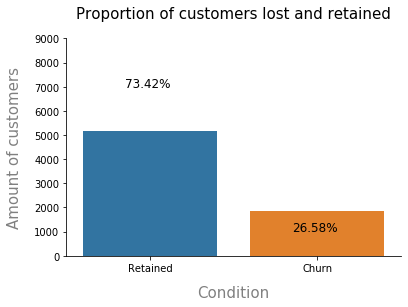

In [13]:
amount_retained = tel_df.Churn.value_counts()[0] / tel_df.shape[0] * 100
amount_lost = tel_df.Churn.value_counts()[1] / tel_df.shape[0] * 100

sns.countplot(x='Churn', data=tel_df)
plt.xticks([0, 1], ['Retained', 'Churn'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()

##### 1869 / 7032 customers churned last month, representing 26,53% of the total. 

In [14]:
churn = tel_df.groupby('Churn')
churn.mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128995,37.650010,61.307408,2318.432532
Yes,0.254682,17.979133,74.441332,2190.079314


##### On average, female clients spent $2,190.07 in total compared to $2,318.43 for the rest; and $74.44 per month well above the monthly average of $61.30 for the remaining clients.

In [15]:
churned_Msum = tel_df.groupby('Churn')['MonthlyCharges','TotalCharges'].sum()
churned_Msum

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MonthlyCharges,TotalCharges
Churn,,
No,316530.15,11951519.7
Yes,139130.85,4086688.0


In [16]:
per_Mchurn = churned_Msum.MonthlyCharges[1]/tel_df.MonthlyCharges.sum()
per_Tchurn = churned_Msum.TotalCharges[1]/tel_df.TotalCharges.sum()
print('Percentage of monthly revenue lost',f"{round(per_Mchurn*100, 2)}%")
print('Percentage of total revenue lost',f"{round(per_Tchurn*100, 2)}%")



Percentage of monthly revenue lost 30.53%
Percentage of total revenue lost 25.48%


#### B. Explain churn by the below categories. Are there any factors that combine to be especially impactful?
a.	Customer demographics like age and gender
b.	Services used
c.	Billing information


Cut tenure, MonthlyCharges and TotalCharges into some bins

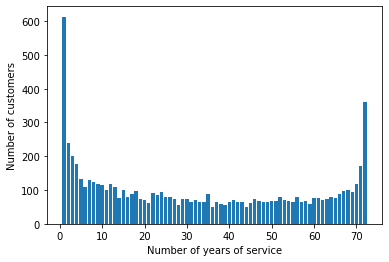

In [17]:
tenure = tel_df.groupby('tenure').count()
plt.bar(tenure.index.values, tenure['gender'])
plt.xlabel('Number of years of service')
plt.ylabel('Number of customers')
plt.show()

In [18]:
# Cut the tenure values into 6 bins

bin_tenure = np.linspace(min(tel_df['tenure']), max(tel_df['tenure']),7)
tenure_names = ['bin1','bin2','bin3','bin4','bin5','bin6']
tel_df['tenure-binned'] = pd.cut(tel_df['tenure'], bin_tenure, labels=tenure_names, include_lowest=True)
tel_df[['tenure', 'tenure-binned']].head(20)

,tenure,tenure-binned
0,1,bin1
1,34,bin3
2,2,bin1
3,45,bin4
4,2,bin1
5,8,bin1
6,22,bin2
7,10,bin1
8,28,bin3
9,62,bin6


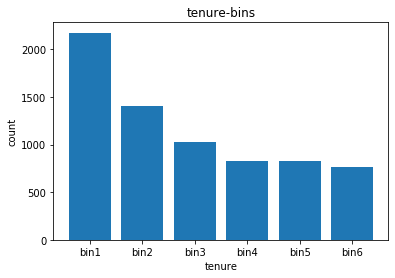

In [19]:
#plot the tenure bins
plt.bar(tenure_names, tel_df['tenure-binned'].value_counts(), width=0.8)

plt.xlabel('tenure')
plt.ylabel('count')
plt.title('tenure-bins')
plt.show()

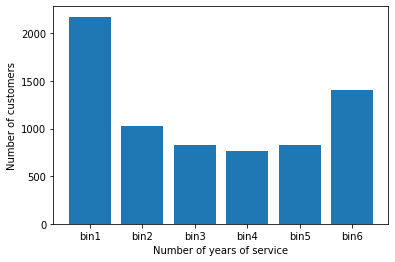

In [20]:
tenure = tel_df.groupby('tenure-binned').count()
plt.bar(tenure.index.values, tenure['gender'])
plt.xlabel('Number of years of service')
plt.ylabel('Number of customers')
plt.show()

In [21]:
# Cut the MonthlyCharges values into 6 bins

bin_MonthlyCharges = np.linspace(min(tel_df['MonthlyCharges']), max(tel_df['MonthlyCharges']),13)
MonthlyCharges_names = ['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12']
tel_df['MonthlyCharges-binned'] = pd.cut(tel_df['MonthlyCharges'], bin_MonthlyCharges, labels=MonthlyCharges_names, include_lowest=True)
tel_df[['MonthlyCharges', 'MonthlyCharges-binned']].head(20)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,bin2
1,56.95,bin5
2,53.85,bin5
3,42.30,bin3
4,70.70,bin7
5,99.65,bin10
6,89.10,bin9
7,29.75,bin2
8,104.80,bin11
9,56.15,bin5


In [22]:
# Cut the tenure values into 6 bins

bin_TotalCharges = np.linspace(min(tel_df['TotalCharges']), max(tel_df['TotalCharges']),11)
tenure_names = ['bin1','bin2','bin3','bin4','bin5','bin6','bin7', 'bin8', 'bin9','bin10']
tel_df['TotalCharges-binned'] = pd.cut(tel_df['TotalCharges'], bin_TotalCharges, labels=tenure_names,include_lowest=True)
tel_df[['TotalCharges', 'TotalCharges-binned']].head(20)

,TotalCharges,TotalCharges-binned
0,29.85,bin1
1,1889.50,bin3
2,108.15,bin1
3,1840.75,bin3
4,151.65,bin1
5,820.50,bin1
6,1949.40,bin3
7,301.90,bin1
8,3046.05,bin4
9,3487.95,bin5


One hot Encoding some categorical values

In [23]:
dummy_var = pd.get_dummies(tel_df[['gender', 'tenure-binned', 'MonthlyCharges-binned', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']])
dummy_var

,gender_Female,gender_Male,tenure-binned_bin1,tenure-binned_bin2,tenure-binned_bin3,tenure-binned_bin4,tenure-binned_bin5,tenure-binned_bin6,MonthlyCharges-binned_bin1,MonthlyCharges-binned_bin2,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [24]:
tel_df = pd.concat([tel_df, dummy_var], axis=1)
tel_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1,0,0,1,0,0,0,1,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,1,0,0,1,0,1,0,0,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,0,0,0,1,0,0,1,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,0,0,1,0,0,0,1,0,1


Let's look at the mean of some variables regarding the churn status

In [25]:
churn1 = tel_df.groupby('Churn')
mean_churn= churn1.mean()
mean_churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,tenure-binned_bin1,tenure-binned_bin2,tenure-binned_bin3,tenure-binned_bin4,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
Churn,,,,,,,,,,,,,,,,,,,,,
No,0.128995,37.650010,61.307408,2318.432532,0.492737,0.507263,0.220414,0.141391,0.126283,0.119504,...,0.252954,0.317064,0.463878,0.536122,0.248693,0.249661,0.250629,0.251017,1.0,0.0
Yes,0.254682,17.979133,74.441332,2190.079314,0.502408,0.497592,0.554842,0.157303,0.096308,0.077582,...,0.088818,0.025682,0.250936,0.749064,0.138042,0.124131,0.573034,0.164794,0.0,1.0


#### Customer who churn (Features where customer churn average is greatest...)

In [26]:
print(mean_churn.loc[:,['SeniorCitizen','MonthlyCharges','gender_Female','Partner_No','Dependents_No','PaperlessBilling_Yes','PaymentMethod_Electronic check','MultipleLines_Yes','InternetService_Fiber optic','OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No']])


       SeniorCitizen  MonthlyCharges  gender_Female  Partner_No  \
Churn                                                             
No          0.128995       61.307408       0.492737    0.472400   
Yes         0.254682       74.441332       0.502408    0.642055   

       Dependents_No  PaperlessBilling_Yes  PaymentMethod_Electronic check  \
Churn                                                                        
No          0.656595              0.536122                        0.250629   
Yes         0.825575              0.749064                        0.573034   

       MultipleLines_Yes  InternetService_Fiber optic  OnlineSecurity_No  \
Churn                                                                      
No              0.410033                     0.348441           0.394344   
Yes             0.454789                     0.693954           0.781701   

       OnlineBackup_No  DeviceProtection_No  
Churn                                        
No            0.35909

Ces resultats nous demontrent comment certaines variables contribuent au desabonnement des clients.

In [27]:
mean_churn.loc[:,['TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_Yes','Contract_Month-to-month']]

,TechSupport_No,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month
Churn,,,,,,
No,0.392408,0.361611,0.365873,0.356963,0.370521,0.429983
Yes,0.773676,0.504013,0.435527,0.501873,0.437667,0.885500


In [28]:
# Who not churn

In [29]:
#mean_churn.loc[:,['MonthlyCharges','TotalCharges','Partner_No','Dependents_Yes','Contract_One year','Contract_Two year','PaperlessBilling_No','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check''Dependents_Yes','OnlineBackup_Yes','PhoneService_No','PhoneService_Yes','MultipleLines_No','MultipleLines_No phone service','InternetService_DSL','InternetService_No',
#                  'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No internet service','DeviceProtection_No internet service','DeviceProtection_Yes','TechSupport_No internet service','TechSupport_Yes','StreamingTV_No internet service','StreamingMovies_No internet service']]

In [30]:
tel_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,tenure-binned_bin1,tenure-binned_bin2,tenure-binned_bin3,tenure-binned_bin4,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
count,7032.000000,7032.000000,7032.000000,7021.00000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2284.31957,0.495307,0.504693,0.309300,0.14562,0.118316,0.108362,...,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100,0.734215,0.265785
std,0.368844,24.545260,30.085974,2267.24284,0.500014,0.500014,0.462238,0.35275,0.323005,0.310859,...,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637,0.441782,0.441782
min,0.000000,1.000000,18.250000,18.80000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.50000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1398.25000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,55.000000,89.862500,3795.45000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.80000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Let's Plot

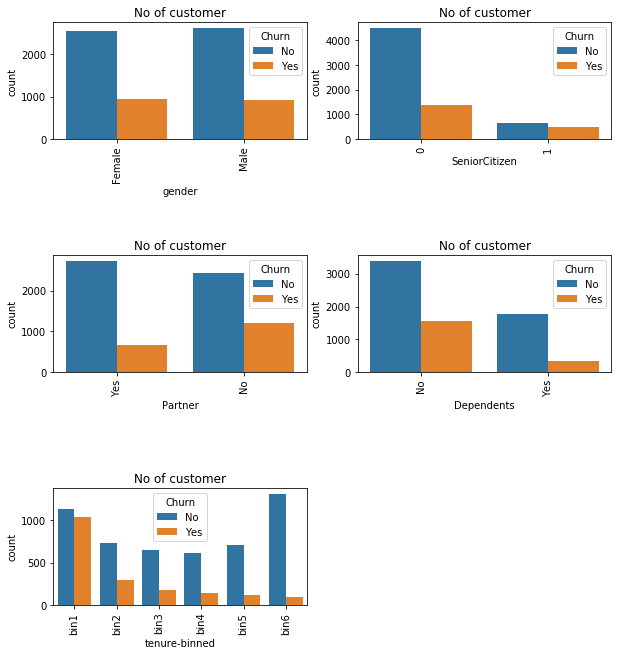

In [31]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure-binned']
fig = plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=tel_df, hue='Churn')
    plt.xticks(rotation=90)
    plt.title('No of customer')

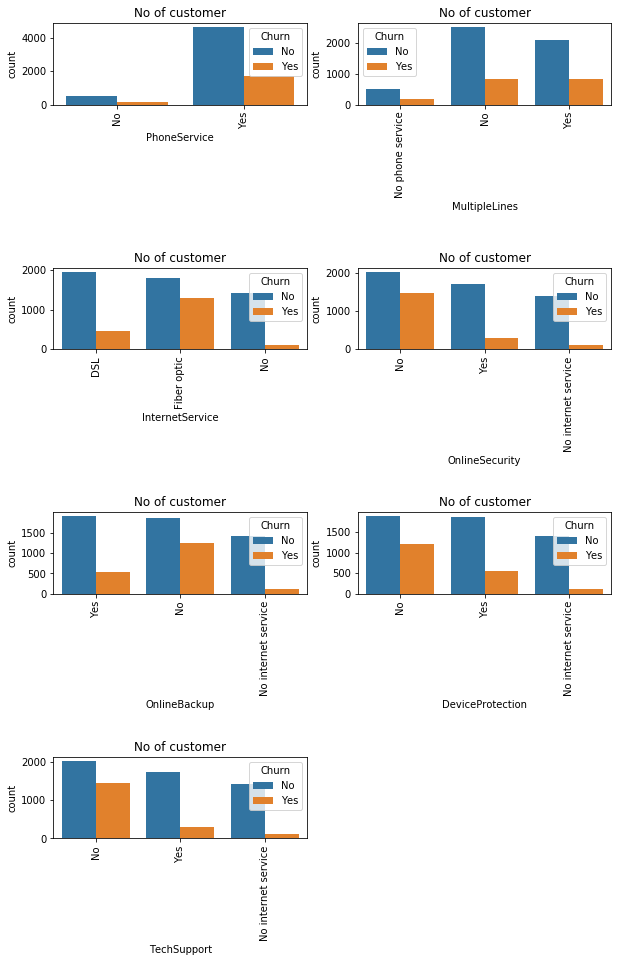

In [32]:
features = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
fig = plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=j, data=tel_df, hue='Churn')
    plt.xticks(rotation=90)
    plt.title('No of customer')

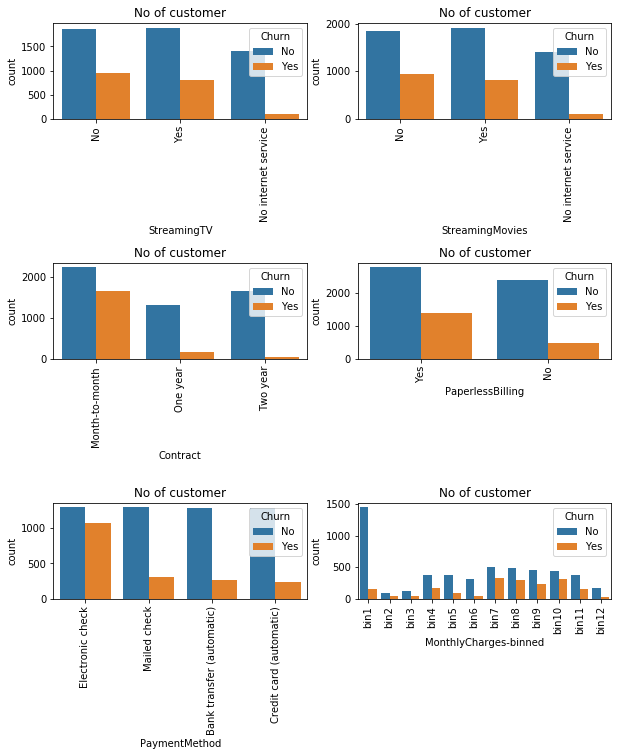

In [33]:
features = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges-binned']
fig = plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.5)
    sns.countplot(x=j, data=tel_df, hue='Churn')
    plt.xticks(rotation=90)
    plt.title('No of customer')

In [34]:
tel_df.groupby('Churn')['tenure', 'gender'].mean()

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,tenure
Churn,
No,37.650010
Yes,17.979133


We can observe that 26.54% of the customers have churned.

In [35]:
tel_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned',
       'gender_Female', 'gender_Male', 'tenure-binned_bin1',
       'tenure-binned_bin2', 'tenure-binned_bin3', 'tenure-binned_bin4',
       'tenure-binned_bin5', 'tenure-binned_bin6',
       'MonthlyCharges-binned_bin1', 'MonthlyCharges-binned_bin2',
       'MonthlyCharges-binned_bin3', 'MonthlyCharges-binned_bin4',
       'MonthlyCharges-binned_bin5', 'MonthlyCharges-binned_bin6',
       'MonthlyCharges-binned_bin7', 'MonthlyCharges-binned_bin8',
       'MonthlyCharges-binned_bin9', 'MonthlyCharges-binned_bin10',
       'MonthlyCharges-binned_bin11', 'MonthlyCha

In [36]:
cat_values = tel_df[['gender_Female', 'gender_Male', 'tenure-binned_bin1',
       'tenure-binned_bin2', 'tenure-binned_bin3', 'tenure-binned_bin4',
       'tenure-binned_bin5', 'tenure-binned_bin6',
       'MonthlyCharges-binned_bin1', 'MonthlyCharges-binned_bin2',
       'MonthlyCharges-binned_bin3', 'MonthlyCharges-binned_bin4',
       'MonthlyCharges-binned_bin5', 'MonthlyCharges-binned_bin6',
       'MonthlyCharges-binned_bin7', 'MonthlyCharges-binned_bin8',
       'MonthlyCharges-binned_bin9', 'MonthlyCharges-binned_bin10',
       'MonthlyCharges-binned_bin11', 'MonthlyCharges-binned_bin12',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure-binned', 'MonthlyCharges-binned',
       'TotalCharges-binned','Churn_Yes']]

In [37]:
corr_cat = cat_values.corr().sort_values(by='Churn_Yes')
corr_cat

,gender_Female,gender_Male,tenure-binned_bin1,tenure-binned_bin2,tenure-binned_bin3,tenure-binned_bin4,tenure-binned_bin5,tenure-binned_bin6,MonthlyCharges-binned_bin1,MonthlyCharges-binned_bin2,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
Contract_Two year,0.003603,-0.003603,-0.333850,-0.146749,-0.106618,-0.004919,0.080082,0.540336,0.198825,-0.067488,...,-0.621933,-0.288843,1.000000,0.146281,-0.146281,0.155004,0.174410,-0.281147,-0.007423,-0.301552
StreamingTV_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
OnlineBackup_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
DeviceProtection_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
TechSupport_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
InternetService_No,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
StreamingMovies_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
OnlineSecurity_No internet service,-0.004745,0.004745,0.027554,0.017295,-0.010526,0.002545,-0.020153,-0.024292,0.966715,-0.067241,...,-0.217824,0.038061,0.217542,0.320592,-0.320592,-0.001094,0.001870,-0.284608,0.319694,-0.227578
tenure-binned_bin6,-0.016279,0.016279,-0.334681,-0.206477,-0.183211,-0.174353,-0.183211,1.000000,-0.037099,-0.061021,...,-0.476912,0.016142,0.540336,0.001415,-0.001415,0.184249,0.179294,-0.175456,-0.160053,-0.226078
MonthlyCharges-binned_bin1,-0.008485,0.008485,0.052670,0.017605,-0.015833,-0.004544,-0.028441,-0.037099,1.000000,-0.074715,...,-0.192115,0.026269,0.198825,0.316448,-0.316448,-0.007722,-0.003002,-0.275418,0.320662,-0.212580


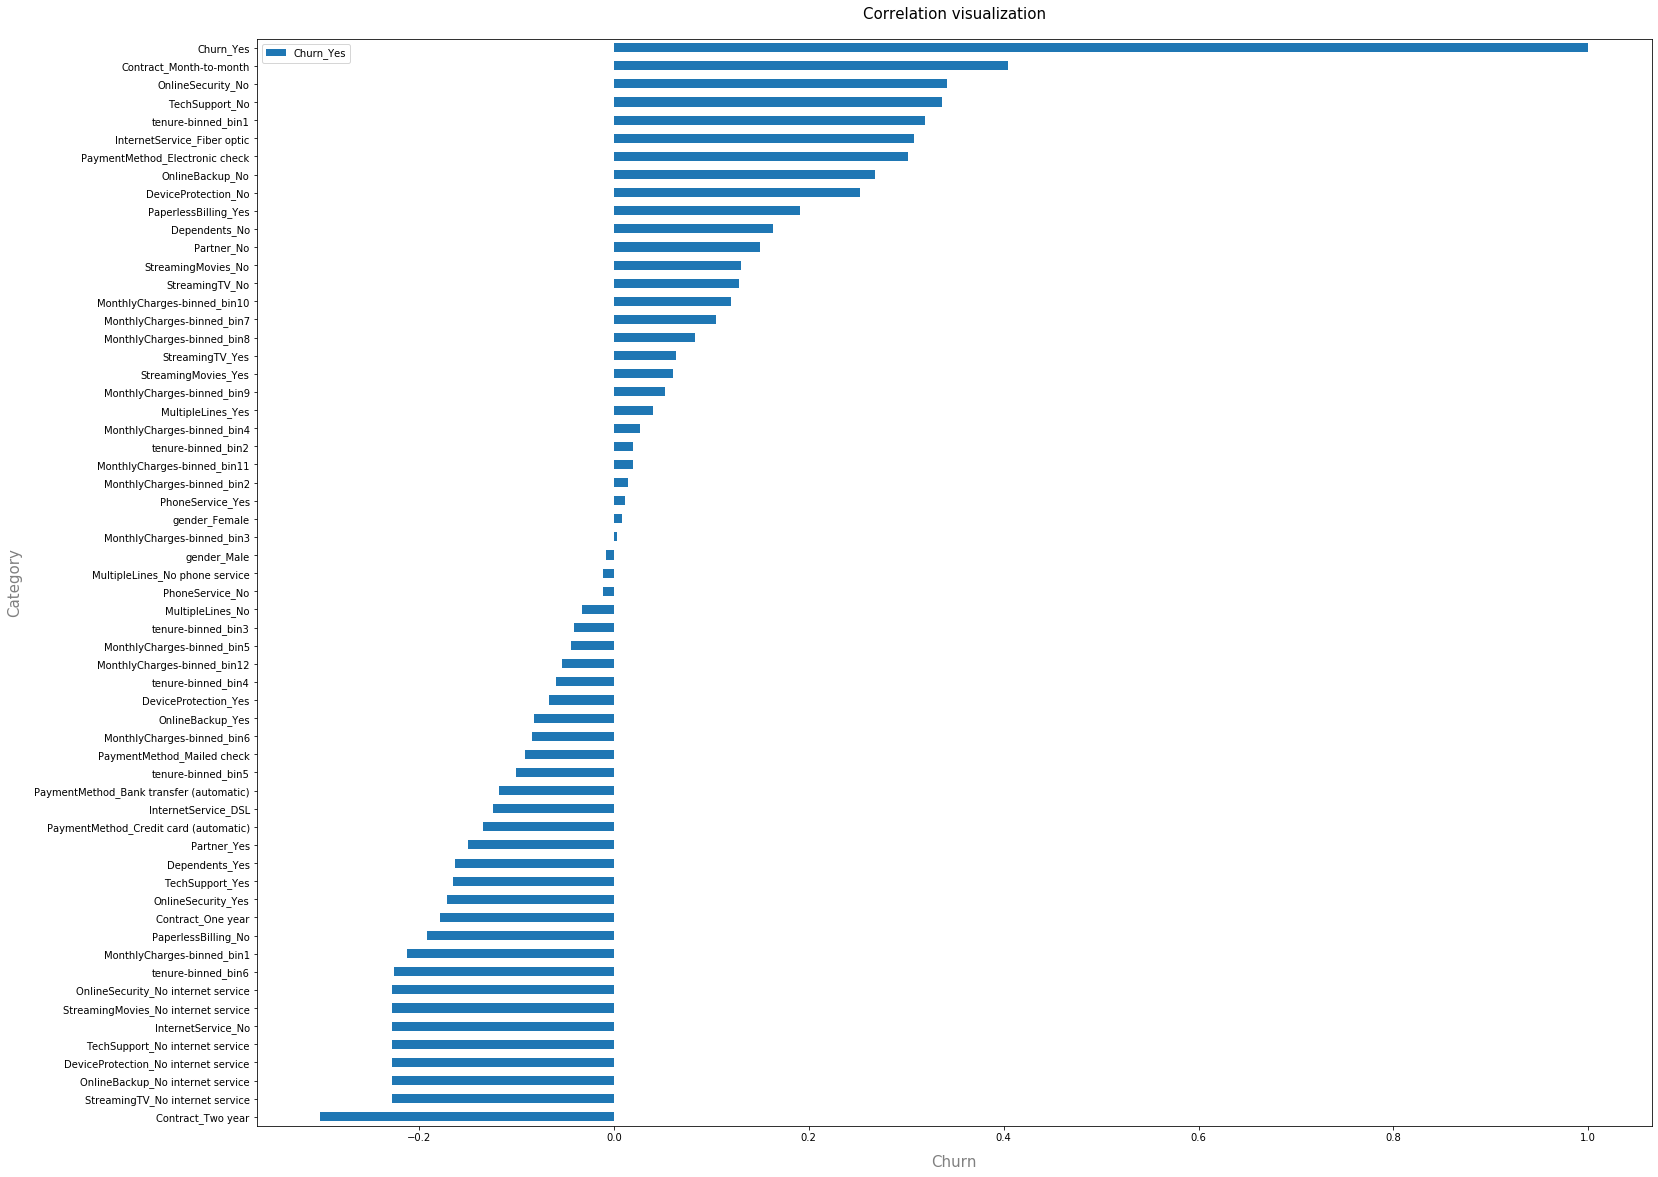

In [38]:
corr_cat[['Churn_Yes']].plot(kind='barh', figsize=(25, 20))
plt.xlabel('Churn', size=15, labelpad=12, color='grey')
plt.ylabel('Category', size=15, labelpad=12, color='grey')
plt.title("Correlation visualization", size=15, pad=20)
plt.show()

#### 'gender','tenure-binned','Churn_Yes'

In [39]:
# grouping results
tel_gptest = tel_df[['gender','tenure-binned','Churn_Yes']]
grouped_test1 = tel_gptest.groupby(['gender','tenure-binned'],as_index=False).mean()
grouped_test1

,gender,tenure-binned,Churn_Yes
0,Female,bin1,0.492122
1,Female,bin2,0.283465
2,Female,bin3,0.244444
3,Female,bin4,0.200000
4,Female,bin5,0.117506
5,Female,bin6,0.053412
6,Male,bin1,0.461679
7,Male,bin2,0.290698
8,Male,bin3,0.189696
9,Male,bin4,0.179558


In [40]:
grouped_pivot = grouped_test1.pivot(index='gender',columns='tenure-binned')
grouped_pivot

Churn_Yes                                                  
tenure-binned      bin1      bin2      bin3      bin4      bin5      bin6
gender                                                                   
Female         0.492122  0.283465  0.244444  0.200000  0.117506  0.053412
Male           0.461679  0.290698  0.189696  0.179558  0.171084  0.077763

By averaging the sexes in category 1 (with less than a year at the company level) are much more likely to leave it. 49% female and 46% male. However, we can notice that the more years the sexes accumulate, the more they tend to stay there. The last category ([bin6] i.e. with more years are the least inclined to leave.

Now, visualize 

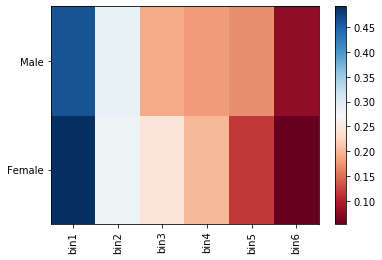

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [42]:
grouped_test2=tel_gptest[['gender', 'Churn_Yes']].groupby(['gender'])
grouped_test2.head(2)

,gender,Churn_Yes
0,Female,0
1,Male,0
2,Male,1
4,Female,1


In [43]:
tel_gptest

,gender,tenure-binned,Churn_Yes
0,Female,bin1,0
1,Male,bin3,0
2,Male,bin1,1
3,Male,bin4,0
4,Female,bin1,1
...,...,...,...
7038,Male,bin2,0
7039,Female,bin6,0
7040,Female,bin1,0
7041,Male,bin1,1


In [44]:
grouped_test2.get_group('Male')['Churn_Yes']

1       0
2       1
3       0
6       0
9       0
       ..
7033    0
7035    0
7038    0
7041    1
7042    0
Name: Churn_Yes, Length: 3549, dtype: uint8

In [45]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Male')['Churn_Yes'], grouped_test2.get_group('Female')['Churn_Yes'])#, grouped_test2.get_group('bin2')['Churn_Yes'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.5133042995497724 , P = 0.47373573731941376


#### 'gender','tenure-binned','SeniorCitizen'

In [46]:
# grouping results (gender, tenure, SeniorCitizen)
tel_gptest2 = tel_df[['gender','tenure-binned','SeniorCitizen','Churn_Yes']]
grouped_test2 = tel_gptest2.groupby(['gender','tenure-binned','SeniorCitizen'],as_index=False).mean()
grouped_test2

,gender,tenure-binned,SeniorCitizen,Churn_Yes
0,Female,bin1,0,0.451965
1,Female,bin1,1,0.717791
2,Female,bin2,0,0.249417
3,Female,bin2,1,0.468354
4,Female,bin3,0,0.202454
5,Female,bin3,1,0.417722
6,Female,bin4,0,0.160121
7,Female,bin4,1,0.391304
8,Female,bin5,0,0.099125
9,Female,bin5,1,0.202703


It turns out that in the category of adults who are much more likely to leave the company [bin1], SeniorCitizen(1) Male and Female are more likely to do so on average with 0.7177 (vs. 0.4519) and 0.6369 (vs. 0.4332) respectively.

In [47]:
#### PhoneService, MultipleLines, InternetService

In [48]:
# grouping results (PhoneService, MultipleLines, InternetService)
tel_gptest3 = tel_df[['PhoneService','MultipleLines','InternetService','Churn_Yes']]
grouped_test3 = tel_gptest3.groupby(['PhoneService','MultipleLines','InternetService'],as_index=False).mean()
grouped_test3

,PhoneService,MultipleLines,InternetService,Churn_Yes
0,No,No phone service,DSL,0.250000
1,Yes,No,DSL,0.206304
2,Yes,No,Fiber optic,0.457686
3,Yes,No,No,0.087288
4,Yes,Yes,DSL,0.105951
5,Yes,Yes,Fiber optic,0.395769
6,Yes,Yes,No,0.029412


On average, among customers using PhoneService, MultipleLines and InternetService, non-Fiber optic (InternetService) customers are more likely to leave.


In [49]:
# grouping services (OnlineSecurity, OnlineBackup, DeviceProtection)
tel_gptest4 = tel_df[['OnlineSecurity','OnlineBackup','DeviceProtection','Churn_Yes']]
grouped_test4 = tel_gptest4.groupby(['OnlineSecurity','OnlineBackup','DeviceProtection'],as_index=False).mean()
grouped_test4

,OnlineSecurity,OnlineBackup,DeviceProtection,Churn_Yes
0,No,No,No,0.525514
1,No,No,Yes,0.384840
2,No,Yes,No,0.348083
3,No,Yes,Yes,0.269231
4,No internet service,No internet service,No internet service,0.074342
5,Yes,No,No,0.248421
6,Yes,No,Yes,0.139089
7,Yes,Yes,No,0.148148
8,Yes,Yes,Yes,0.079595


On average, customers who are not subscribers to OnlineSecurity and OnlineBackup are more likely to leave the company. It follows that those who are not subscribers to DeviceProtection also play an important role in their departure. 

In [50]:
# grouping services ('TechSupport','StreamingTV','StreamingMovies')
tel_gptest5 = tel_df[['TechSupport','StreamingTV','StreamingMovies','Churn_Yes']]
grouped_test5 = tel_gptest5.groupby(['TechSupport','StreamingTV','StreamingMovies'],as_index=False).mean()
grouped_test5

,TechSupport,StreamingTV,StreamingMovies,Churn_Yes
0,No,No,No,0.411924
1,No,No,Yes,0.419291
2,No,Yes,No,0.405680
3,No,Yes,Yes,0.427136
4,No internet service,No internet service,No internet service,0.074342
5,Yes,No,No,0.160813
6,Yes,No,Yes,0.119718
7,Yes,Yes,No,0.158672
8,Yes,Yes,Yes,0.154661


For TechSupport, StreamingTV and StreamingMovies services, customers who are not registered for TechSupport but are registered for StreamingMovies are much more likely to leave.


In [51]:
# grouping services  ('Contract','PaperlessBilling','PaymentMethod')
tel_gptest5 = tel_df[['Contract','PaperlessBilling','PaymentMethod','Churn_Yes']]
grouped_test5 = tel_gptest5.groupby(['Contract','PaperlessBilling','PaymentMethod'],as_index=False).mean()
grouped_test5

,Contract,PaperlessBilling,PaymentMethod,Churn_Yes
0,Month-to-month,No,Bank transfer (automatic),0.266990
1,Month-to-month,No,Credit card (automatic),0.279503
2,Month-to-month,No,Electronic check,0.415011
3,Month-to-month,No,Mailed check,0.251599
4,Month-to-month,Yes,Bank transfer (automatic),0.381201
5,Month-to-month,Yes,Credit card (automatic),0.348168
6,Month-to-month,Yes,Electronic check,0.576951
7,Month-to-month,Yes,Mailed check,0.386792
8,One year,No,Bank transfer (automatic),0.064327
9,One year,No,Credit card (automatic),0.074713


On average, customers with a month-to-month contract, using e-checks as a PaymentMethod and enrolled in PaperlessBilling (Yes) are much more likely to leave (0.576951).
Those with a Two year contract, PaperlessBilling (No), using Mailed check as payment method are the last to leave.


#### Percent

In [52]:
# grouping results
tel_gptestP = tel_df[['gender','tenure-binned','Churn_Yes']]
grouped_testP1 = tel_gptestP.groupby(['gender','tenure-binned'],as_index=False).count()
grouped_testP1['percent'] = grouped_testP1['Churn_Yes']/len(tel_df['Churn_Yes'])*100
grouped_testP1

,gender,tenure-binned,Churn_Yes,percent
0,Female,bin1,1079,15.344141
1,Female,bin2,508,7.224118
2,Female,bin3,405,5.759386
3,Female,bin4,400,5.688282
4,Female,bin5,417,5.930034
5,Female,bin6,674,9.584755
6,Male,bin1,1096,15.585893
7,Male,bin2,516,7.337884
8,Male,bin3,427,6.072241
9,Male,bin4,362,5.147895


In [53]:
# grouping results (gender, tenure, SeniorCitizen)
tel_gptestP2 = tel_df[['gender','tenure-binned','SeniorCitizen','Churn_Yes']]
grouped_testP2 = tel_gptestP2.groupby(['gender','tenure-binned','SeniorCitizen'],as_index=False).count()
grouped_testP2['percent'] = grouped_testP2['Churn_Yes']/len(tel_df['Churn_Yes'])*100
grouped_testP2

,gender,tenure-binned,SeniorCitizen,Churn_Yes,percent
0,Female,bin1,0,916,13.026166
1,Female,bin1,1,163,2.317975
2,Female,bin2,0,429,6.100683
3,Female,bin2,1,79,1.123436
4,Female,bin3,0,326,4.635950
5,Female,bin3,1,79,1.123436
6,Female,bin4,0,331,4.707053
7,Female,bin4,1,69,0.981229
8,Female,bin5,0,343,4.877702
9,Female,bin5,1,74,1.052332


In [54]:
# grouping results (PhoneService, MultipleLines, InternetService)
tel_gptestP3 = tel_df[['PhoneService','MultipleLines','InternetService','Churn_Yes']]
grouped_testP3 = tel_gptestP3.groupby(['PhoneService','MultipleLines','InternetService'],as_index=False).count()
grouped_testP3['percent'] = grouped_testP3['Churn_Yes']/len(tel_df['Churn_Yes'])*100
grouped_testP3

,PhoneService,MultipleLines,InternetService,Churn_Yes,percent
0,No,No phone service,DSL,680,9.670080
1,Yes,No,DSL,1047,14.889078
2,Yes,No,Fiber optic,1158,16.467577
3,Yes,No,No,1180,16.780432
4,Yes,Yes,DSL,689,9.798066
5,Yes,Yes,Fiber optic,1938,27.559727
6,Yes,Yes,No,340,4.835040


In [55]:
# grouping services (OnlineSecurity, OnlineBackup, DeviceProtection)
tel_gptestP4 = tel_df[['OnlineSecurity','OnlineBackup','DeviceProtection','Churn_Yes']]
grouped_testP4 = tel_gptestP4.groupby(['OnlineSecurity','OnlineBackup','DeviceProtection'],as_index=False).count()
grouped_testP4['percent'] = grouped_testP4['Churn_Yes']/len(tel_df['Churn_Yes'])*100
grouped_testP4

,OnlineSecurity,OnlineBackup,DeviceProtection,Churn_Yes,percent
0,No,No,No,1509,21.459044
1,No,No,Yes,686,9.755404
2,No,Yes,No,678,9.641638
3,No,Yes,Yes,624,8.873720
4,No internet service,No internet service,No internet service,1520,21.615472
5,Yes,No,No,475,6.754835
6,Yes,No,Yes,417,5.930034
7,Yes,Yes,No,432,6.143345
8,Yes,Yes,Yes,691,9.826507


In [56]:
# grouping services  ('Contract','PaperlessBilling','PaymentMethod')
tel_gptestP5 = tel_df[['Contract','PaperlessBilling','PaymentMethod','Churn_Yes']]
grouped_testP5 = tel_gptestP5.groupby(['Contract','PaperlessBilling','PaymentMethod'],as_index=False).count()
grouped_testP5['percent'] = grouped_testP5['Churn_Yes']/len(tel_df['Churn_Yes'])*100
grouped_testP5

,Contract,PaperlessBilling,PaymentMethod,Churn_Yes,percent
0,Month-to-month,No,Bank transfer (automatic),206,2.929465
1,Month-to-month,No,Credit card (automatic),161,2.289534
2,Month-to-month,No,Electronic check,453,6.441980
3,Month-to-month,No,Mailed check,469,6.669511
4,Month-to-month,Yes,Bank transfer (automatic),383,5.446530
5,Month-to-month,Yes,Credit card (automatic),382,5.432309
6,Month-to-month,Yes,Electronic check,1397,19.866325
7,Month-to-month,Yes,Mailed check,424,6.029579
8,One year,No,Bank transfer (automatic),171,2.431741
9,One year,No,Credit card (automatic),174,2.474403


### Modeling

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [58]:
churn_mod = tel_df.reset_index(drop=True) #[tel_df['Churn']=='No'].reset_index(drop=True)
#churn_mod = churn_mod
churn_mod

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1,0,0,1,0,0,0,1,1,0
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,1,0,0,1,0,1,0,0,1,0
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,0,0,0,1,0,0,1,0,1,0
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,0,0,1,0,0,0,1,0,1


In [59]:
churn_mod = churn_mod[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
churn_mod.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
churn_mod['gender'] = churn_mod['gender'].astype('category').cat.codes
churn_mod['Partner'] = churn_mod['Partner'].astype('category').cat.codes
churn_mod['Dependents'] = churn_mod['Dependents'].astype('category').cat.codes
churn_mod['PhoneService'] = churn_mod['PhoneService'].astype('category').cat.codes
churn_mod['MultipleLines'] = churn_mod['MultipleLines'].astype('category').cat.codes
churn_mod['InternetService'] = churn_mod['InternetService'].astype('category').cat.codes
churn_mod['OnlineSecurity'] = churn_mod['OnlineSecurity'].astype('category').cat.codes
churn_mod['OnlineBackup'] = churn_mod['OnlineBackup'].astype('category').cat.codes
churn_mod['DeviceProtection'] = churn_mod['DeviceProtection'].astype('category').cat.codes
churn_mod['TechSupport'] = churn_mod['TechSupport'].astype('category').cat.codes
churn_mod['StreamingTV'] = churn_mod['StreamingTV'].astype('category').cat.codes
churn_mod['StreamingMovies'] = churn_mod['StreamingMovies'].astype('category').cat.codes
churn_mod['Contract'] = churn_mod['Contract'].astype('category').astype('category').cat.codes
churn_mod['PaperlessBilling'] = churn_mod['PaperlessBilling'].astype('category').cat.codes
churn_mod['PaymentMethod'] = churn_mod['PaymentMethod'].astype('category').cat.codes


churn_mod['Churn'] = churn_mod['Churn'].astype('category').cat.codes

C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mergnificent\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [61]:
churn_mod.dtypes, churn_mod.shape

(gender                 int8
 SeniorCitizen         int64
 Partner                int8
 Dependents             int8
 tenure                int64
 PhoneService           int8
 MultipleLines          int8
 InternetService        int8
 OnlineSecurity         int8
 OnlineBackup           int8
 DeviceProtection       int8
 TechSupport            int8
 StreamingTV            int8
 StreamingMovies        int8
 Contract               int8
 PaperlessBilling       int8
 PaymentMethod          int8
 MonthlyCharges      float64
 TotalCharges        float64
 Churn                  int8
 dtype: object,
 (7032, 20))

In [62]:
X = churn_mod[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = churn_mod.Churn

model = StandardScaler().fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 19) (5625,)
Test set: (1407, 19) (1407,)


In [64]:
!pip install xgboost

In [65]:
import xgboost as xgb

In [66]:
model = xgb.XGBClassifier()
model = model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [67]:
yhat[0:50]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0], dtype=int8)

In [68]:
tel_df.shape, churn_mod.shape

((7032, 85), (7032, 20))

In [69]:
print('Training set accuracy', model.score(X_train, y_train))
print('Testing set accuracy', model.score(X_test, y_test))

Training set accuracy 0.9592888888888889
Testing set accuracy 0.7903340440653873


In [70]:
from sklearn import metrics 
print('Accuracy:', metrics.accuracy_score(y_test, yhat))
print('Precision:', metrics.precision_score(y_test, yhat))
print('Recall:', metrics.recall_score(y_test, yhat))

Accuracy: 0.7903340440653873
Precision: 0.618421052631579
Recall: 0.5122615803814714


In [71]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1995,0,1,0,0,9,1,0,1,0,0,2,0,0,0,0,0,1,75.50,4941.80
4528,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.35,80.55
5013,0,0,1,1,23,1,2,1,2,0,0,0,0,0,1,0,1,81.85,355.10
1643,1,1,1,1,60,1,2,1,2,0,0,0,0,0,0,1,2,80.95,1185.95
2105,0,0,0,0,3,1,0,2,1,1,1,1,1,1,0,0,2,20.20,8477.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,1,0,0,0,15,1,2,0,0,0,0,0,0,0,0,0,2,51.55,46.40
2204,1,0,1,0,8,1,0,2,1,1,1,1,1,1,0,1,0,19.55,1180.95
6528,1,0,1,0,70,1,2,1,2,2,2,2,2,2,1,0,1,115.65,1275.70
2693,1,0,0,0,2,1,0,2,1,1,1,1,1,1,0,0,3,19.85,50.10


In [72]:
yhat_prob = model.predict_proba(X_test)
yhat_prob

array([[0.9591498 , 0.04085024],
       [0.754853  , 0.24514697],
       [0.9611441 , 0.0388559 ],
       ...,
       [0.7880207 , 0.21197931],
       [0.99714994, 0.00285004],
       [0.77947235, 0.22052762]], dtype=float32)

In [73]:
model.feature_importances_

array([0.01865388, 0.02632378, 0.01720933, 0.02228155, 0.03372881,
       0.01756313, 0.0248221 , 0.08936135, 0.09702925, 0.03148853,
       0.0175803 , 0.0316575 , 0.02368873, 0.02741514, 0.41953793,
       0.0325223 , 0.02248441, 0.0250567 , 0.02159519], dtype=float32)

We find that the 3 most important features are the 3rd, 6th, and 11th feature which are as follows:

1. Partner
2. PhoneServices
3. DeviceProtection
These are the top 3 predictors on whether people are going to stay or leave.  We can use these to be proactive and help prevent customer churn in the future.

In [74]:
predic_colTe = pd.DataFrame(yhat)
X_train['pred'] = predic_colTr

NameError: name 'predic_colTr' is not defined

In [ ]:
predic_colTe = pd.DataFrame(yhat)
y['pred'] = predic_colTr

In [ ]:
y

In [ ]:
X_train#[X_train['pred']==0.0]

In [ ]:
model_test = model.fit(X_test, y_test)
yhat_test = model_test.predict(X_train)
yhat_test

In [ ]:
predic_colTr = pd.DataFrame(yhat_test)
predic_colTe = pd.DataFrame(yhat)
predic_colTr.append(predic_colTe).reset_index(drop=True)
churn_mod['pred'] = predic_colTr

In [ ]:
print(yhat.shape, yhat_test.shape)


In [ ]:
churn_mod